#  **Harnessing the Power of Logistic Regression for Categorical Predictors in Python**

## Shubham Kamboj

## Explore the Depths:

* **Objective**
* **Unlocking Insights from sud.csv Dataset**
* **Essential Libraries for the Journey**
* **Embarking on the Data Odyssey**
* **Preparing the Ground: Creating Dummy Variables**
* **Navigating the Divide: Splitting Data with Twinning Technique**
* **Charting the Course: Fitting a Model with Logistic Regression**
* **Navigating Uncharted Waters: Predicting 'admit' with Test Dataset**
* **Mapping the Terrain: Evaluating Model Performance and Accuracy**


## **Objective**

The objective is to construct a logistic regression model to forecast student admission likelihood, considering variables such as GPA, GRE score, and institutional prestige.

## **Unlocking Insights from sud.csv Dataset**

The sud.csv dataset features a binary response variable, "admit", alongside three predictor variables: "gre", "gpa", and "rank". While "gre" and "gpa" are treated as continuous variables, "rank" assumes categorical values ranging from 1 to 4. Notably, institutions with a rank of 1 denote the highest prestige, whereas those with a rank of 4 represent the lowest. This structured dataset serves as a valuable resource for extracting actionable insights and driving informed decision-making processes.

## **Essential Libraries for the Journey**

In [1]:
# Let's import the required packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## **Embarking on the Data Odyssey**

In [2]:
# Load the data using pandas.read_csv()
df = pd.read_csv("sud.csv")

In [4]:
# Delve into the DataFrame's initial observations
print("Exploring the initial rows of the DataFrame:")
print(df.head())

# Gain additional insights into the structure of the data
print("\nAdditional insights:")
print(" - The DataFrame comprises the first few rows, showcasing the dataset's structure and initial values.")


Exploring the initial rows of the DataFrame:
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

Additional insights:
 - The DataFrame comprises the first few rows, showcasing the dataset's structure and initial values.


The dataset comprises several key predictor variables:

- `gpa`: Grade Point Average
- `gre` score: Graduate Record Examination score
- `rank`: Prestige of an applicant's undergraduate alma mater

Additionally, the column `admit` serves as our binary target variable.


The presence of a column named 'rank' may pose an issue, as 'rank' is also a method within the pandas DataFrame library. Specifically, the 'rank' method calculates the ordered rank (1 through n) of a DataFrame or Series. To avoid potential conflicts and ensure clarity, we intend to rename our 'rank' column to 'prestige'.

In [8]:
# Assigning Custom Column Names
df.columns = ["admit", "gre", "gpa", "rank"]
# Displaying the Updated Column Names
print("Updated Column Names:")
print(df.columns)


Updated Column Names:
Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


In [ ]:
df.describe()

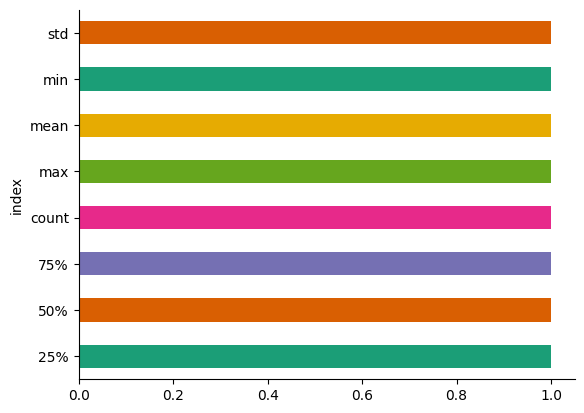

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Addressing Class Imbalance:

Observing a mean of 0.34 for the outcome variable highlights an imbalance within the dataset, indicating a disproportion between outcomes '0' and '1'. In such scenarios, where class distribution is uneven, the F1 score metric emerges as particularly crucial for evaluating classification models effectively. Its application will be further elucidated within this notebook.


## **Preparing the Ground: Creating Dummy Variables**

Utilizing the `pandas` library, we gain substantial control over the representation of categorical variables. In this context, we employ the `get_dummies` function to **encode** the "prestige" column into binary indicator variables.

By invoking `get_dummies`, a new `DataFrame` is generated, featuring binary indicators for each category within the specified column. For instance, the "prestige" column, with four distinct levels (ranging from 1 to 4), yields a corresponding set of four binary columns.

Upon execution of `get_dummies`, the resulting DataFrame comprises four columns, each populated with binary values (0 or 1), signifying the respective level to which the original data point belongs.



In [ ]:
dummy_ranks = pd.get_dummies(df['rank'], prefix = 'rank')
dummy_ranks.head()

Create a clean data frame for our logistic regression model later:

In [17]:
dummy_ranks = pd.DataFrame({
    'prestige_2': (df['rank'] == 2).astype(int),
    'prestige_3': (df['rank'] == 3).astype(int),
    'prestige_4': (df['rank'] == 4).astype(int)
})

cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks)
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


It's worth noting the omission of `prestige_1` in our analysis. Absence of a `1` value within the prestige levels 2 through 4 inherently suggests a level of `prestige_1`. By designating `prestige_1` as our baseline and excluding it from our model fitting, we effectively mitigate multicollinearity—the risk of the dummy variable trap arising from including a dummy variable for every category.


##  **Navigating the Divide: Splitting Data with Twinning Technique**

The Twinning technique partitions datasets into statistically similar disjoint sets, referred to as twins.

To begin, let's install the twinning package:


In [18]:
pip install git+https://github.com/avkl/twinning.git

  Cloning https://github.com/avkl/twinning.git to /tmp/pip-req-build-uv2khg4_
  Running command git clone --filter=blob:none --quiet https://github.com/avkl/twinning.git /tmp/pip-req-build-uv2khg4_
  Resolved https://github.com/avkl/twinning.git to commit 8c6ffdd73531039733a52f0f8cf67efe4f38383f
  Preparing metadata (setup.py) ... done
Processing //tmp/pip-req-build-uv2khg4_/twinning_cpp (from twinning==1.0)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for twinning: filename=twinning-1.0-py3-none-any.whl size=9434 sha256=22869a2338e712c507d0f4a67fedaf09fb1adc3d9c834e8286616f14089ff8f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-baksuvuo/wheels/b6/fc/85/f1685afe9f1e31f863d146afbc4fa65ec971797b51b80971d3
  Created wheel for twinning_cpp: filename=twinning_cpp-1.0-cp310-cp310-linux_x86_64.whl size=67917 sha256=3f12247faf9abe39e2533c82917936cbf0305064fcc9a2eedb32615dfd08f3e4
  St

In [19]:
from twinning import twin

The following code creates an 80-20 partition of the dataset using the twin() function. It takes a numpy ndarray as the dataset and an integer parameter 'r' representing the inverse of the partitioning ratio. For an 80-20 split, 'r' is calculated as 1 / 0.2 = 5. The function returns the indices of the smaller twin.


In [20]:
twin_idx = twin(data.to_numpy(), r=5)

In [21]:
twin_idx

array([183, 270, 303, 377, 268, 194, 381,  42, 190,  28, 326, 260, 235,
        86, 132, 161,  65, 258, 363, 232,  35, 323, 379, 349, 274, 259,
         9, 353, 395, 325, 149, 113,  29, 332,  40,  69, 330, 114, 192,
       367, 186,  32, 255, 196, 336, 123, 365, 108,  43, 170,  99, 168,
       115, 147, 242, 301, 205, 263, 334, 306, 277, 207,  79, 241, 284,
       372, 141, 313, 314, 136, 251,  80,  52, 199, 203, 166, 227, 238,
        71,   2], dtype=uint64)

Creating a dataframe by dropping indices in twin_idx to create bigger twin which will be used to train the model

In [22]:
data_train=data.drop(data.index[[116, 327, 290, 201, 190, 390, 268, 391,  89, 370, 241,  79,  26,
       364, 148, 316, 247, 232,  97, 298, 387, 138, 158, 326,  13, 160,
       308,  93, 163, 240,  65,  73, 292,   9, 185, 149, 113,  29, 332,
       366, 122, 396,  20, 271, 153, 169, 249, 399, 221, 114, 331,  54,
       196, 245, 165, 103, 170,  99, 108, 304,  83,  47, 283, 230, 314,
       111, 342, 282, 210,  16, 141,  27,  59, 289, 242, 301, 263,  12,
       234, 237]])

Splitting the data into train and test set

In [23]:
X_train = data_train.iloc[:, :-1].values
Y_train = data_train.iloc[:, -1].values
X_test = data.iloc[[116, 327, 290, 201, 190, 390, 268, 391,  89, 370, 241,  79,  26,
       364, 148, 316, 247, 232,  97, 298, 387, 138, 158, 326,  13, 160,
       308,  93, 163, 240,  65,  73, 292,   9, 185, 149, 113,  29, 332,
       366, 122, 396,  20, 271, 153, 169, 249, 399, 221, 114, 331,  54,
       196, 245, 165, 103, 170,  99, 108, 304,  83,  47, 283, 230, 314,
       111, 342, 282, 210,  16, 141,  27,  59, 289, 242, 301, 263,  12,
       234, 237], :-1].values
Y_test = data.iloc[[116, 327, 290, 201, 190, 390, 268, 391,  89, 370, 241,  79,  26,
       364, 148, 316, 247, 232,  97, 298, 387, 138, 158, 326,  13, 160,
       308,  93, 163, 240,  65,  73, 292,   9, 185, 149, 113,  29, 332,
       366, 122, 396,  20, 271, 153, 169, 249, 399, 221, 114, 331,  54,
       196, 245, 165, 103, 170,  99, 108, 304,  83,  47, 283, 230, 314,
       111, 342, 282, 210,  16, 141,  27,  59, 289, 242, 301, 263,  12,
       234, 237], -1].values

## **Charting the Course: Fitting a Model with Logistic Regression**

Recall that we are predicting the `admit` column using `gre`, `gpa` and the prestige dummy variables 2 through 4.

In [24]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Navigating Uncharted Waters: Predicting 'admit' with Test Dataset**



In [25]:
Y_pred = model.predict(X_test)

## **Mapping the Terrain: Evaluating Model Performance and Accuracy**

Given the imbalance within our dataset, the F1 score serves as our chosen performance metric.


The F1 score represents the harmonic mean of precision and recall. It attains its optimal value of 1 when both precision and recall are at their best and decreases towards 0 as performance deteriorates.


In [28]:
confusion_matrix(Y_test, Y_pred)

array([[63,  3],
       [ 5,  9]])

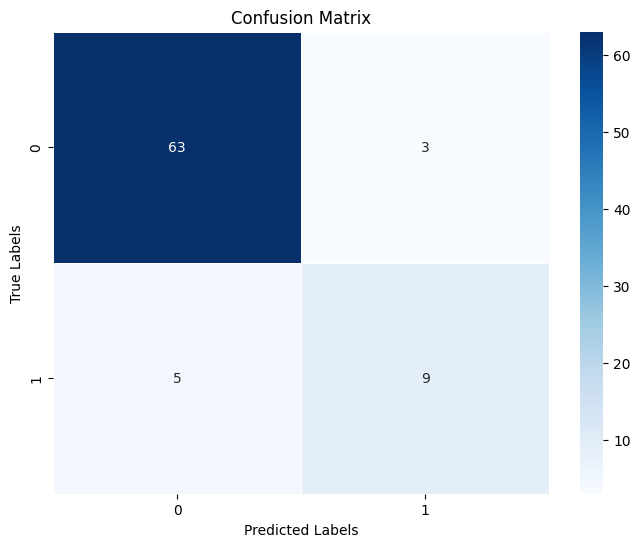

Accuracy: 0.90
Precision: 0.75
Recall: 0.64
F1 Score: 0.69


In [30]:
# Generating Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculating Accuracy and Other Metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Computing the F1 score

 We use  `average = 'weighted'`.This accounts for label imbalance

In [32]:
 f1_score(Y_test, Y_pred, average='weighted')

0.8969001148105626

Our overall accuracy is 90%